# Углубленное программирование Python. Модуль 2. Алгоритмы поиска.

### Линейный поиск

In [1]:
def lin_search(my_seq, item):
    for i in range(len(my_seq)):
        if my_seq[i] == item:
            return i
    return -1

### Бинарный поиск

In [2]:
def bin_search(my_seq, item):
    first = 0
    last = len(my_seq) - 1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last) // 2
        if my_seq[mid] == item:
            index = mid
        else:
            if item < my_seq[mid]:
                last = mid - 1
            else:
                first = mid + 1
    return index

### Jump Search

In [3]:
import math

def jump_search(my_seq, item):
    length = len(my_seq)
    jump = int(math.sqrt(length))
    left, right = 0, 0
    while left < length and my_seq[left] <= item:
        right = min(length - 1, left + jump)
        if my_seq[left] <= item <= my_seq[right]:
            break
        left += jump
    if left >= length or my_seq[left] > item:
        return -1
    right = min(length - 1, right)
    i = left
    while i <= right and my_seq[i] <= item:
        if my_seq[i] == item:
            return i
        i += 1
    return -1

### Поиск Фибоначчи

In [4]:
def fib_search(my_seq, item):
    fibm_min_2 = 0
    fibm_min_1 = 1
    fibm = fibm_min_1 + fibm_min_2

    while fibm < len(my_seq):
        fibm_min_2 = fibm_min_1
        fibm_min_1 = fibm
        fibm = fibm_min_1 + fibm_min_2
    index = -1

    while fibm > 1:
        i = min(index + fibm_min_2, (len(my_seq)-1))
        if my_seq[i] < item:
            fibm = fibm_min_1
            fibm_min_1 = fibm_min_2
            fibm_min_2 = fibm - fibm_min_1
            index = i
        elif my_seq[i] > item:
            fibm = fibm_min_2
            fibm_min_1 = fibm_min_1 - fibm_min_2
            fibm_min_2 = fibm - fibm_min_1
        else:
            return i

    if fibm_min_1 and index < (len(my_seq)-1 and my_seq[index+1] == item):
        return index+1
    return -1

### Экспоненциальный поиск

In [5]:
def bin_search(my_seq, item):
    first = 0
    last = len(my_seq) - 1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last) // 2
        if my_seq[mid] == item:
            index = mid
        else:
            if item < my_seq[mid]:
                last = mid - 1
            else:
                first = mid + 1
    return index


def exp_search(my_seq, item):
    if my_seq[0] == item:
        return 0
    index = 1
    while index < len(my_seq) and my_seq[index] <= item:
        index = index * 2
    return bin_search(my_seq[:min(index, len(my_seq))], item)

### Интерполяционный поиск

In [6]:
def interp_search(my_seq, item):
    low = 0
    high = (len(my_seq) - 1)
    while low <= high and my_seq[low] <= item <= my_seq[high]:
        index = low + int(((float(high - low) / (my_seq[high] - my_seq[low])) * (item - my_seq[low])))
        if my_seq[index] == item:
            return index
        if my_seq[index] < item:
            low = index + 1
        else:
            high = index - 1
    return -1

## Практическая работа

Используя рассмотренные алгоритмы поиска, реализованные в виде функций, нужно оценить их эффективность на разных типах входных данных.

Каждый алгоритм нужно протестировать для случайно сгенерированного и отсортированного списка. Оценить эффективность, сделать выводы о применимости алгоритмов.

В качестве входных данных можно использовать сгенерированные списки случайных чисел.

Среднее время исполнения можно оценить, используя библиотеку timeit.

Пример использования библиотеки timeit:

In [10]:
import timeit

# Код, время выполнения которого нужно измерить
code_to_test = ""

# Вычисление среднего времени выполнения кода (100 запусков)
elapsed_time = timeit.timeit(code_to_test, number=100) / 100


Генерация списков:

In [11]:
from random import randint

source_list = [randint(-100000000, 100000000) for i in range(1000000)]  # Генерация списка случайных чисел
source_item_start = source_list[100]   # Элемент из начала исходного массива
source_item_mid = source_list[500000]  # Элемент из середины исходного массива
source_item_end = source_list[990000]  # Элемент из конца исходного массива

sorted_list = sorted(source_list)   # Отсортированный список
sorted_item_start = sorted_list[100]   # Элемент из начала отсортированного массива
sorted_item_mid = sorted_list[500000]  # Элемент из середины отсортированного массива
sorted_item_end = sorted_list[990000]  # Элемент из конца отсортированного массива

## **Решение ПР:**

Создадим три отсортированных списка на 1000, 100 000 и 1 000 000 элементов, сравним эффективность различных вариантов поиска.


# Создадим три списка отсортированных.

In [48]:
sorted_list1000 = sorted([randint(-10000, 10000) for i in range(1000)])   # Отсортированный список
sorted_list1000_mid = sorted_list1000[500]  # Элемент из середины отсортированного массива

In [49]:
sorted_list100000 = sorted([randint(-1000000, 1000000) for i in range(100000)])   # Отсортированный список
sorted_list100000_mid = sorted_list100000[50000]  # Элемент из середины отсортированного массива

In [50]:
sorted_list1000000 = sorted([randint(-10000000, 10000000) for i in range(1000000)])   # Отсортированный список
sorted_list1000000_mid = sorted_list1000000[500000]  # Элемент из середины отсортированного массива

# Линейный поиск

In [59]:
code_to_test1 = lambda: lin_search(sorted_list1000, sorted_list1000_mid)
code_to_test2 = lambda: lin_search(sorted_list100000, sorted_list100000_mid)
code_to_test3 = lambda: lin_search(sorted_list1000000, sorted_list1000000_mid)

# Вычисление среднего времени выполнения кода (100 запусков)
res_lin_1000 = timeit.timeit(code_to_test1, number=100) / 100
res_lin_100000 = timeit.timeit(code_to_test2, number=100) / 100
res_lin_1000000 = timeit.timeit(code_to_test3, number=100) / 100


# Бинарный поиск

In [60]:
code_to_test1 = lambda: bin_search(sorted_list1000, sorted_list1000_mid)
code_to_test2 = lambda: bin_search(sorted_list100000, sorted_list100000_mid)
code_to_test3 = lambda: bin_search(sorted_list1000000, sorted_list1000000_mid)

# Вычисление среднего времени выполнения кода (100 запусков)
res_bin_1000 = timeit.timeit(code_to_test1, number=100) / 100
res_bin_100000 = timeit.timeit(code_to_test2, number=100) / 100
res_bin_1000000 = timeit.timeit(code_to_test3, number=100) / 100


# Jump search

In [61]:
code_to_test1 = lambda: jump_search(sorted_list1000, sorted_list1000_mid)
code_to_test2 = lambda: jump_search(sorted_list100000, sorted_list100000_mid)
code_to_test3 = lambda: jump_search(sorted_list1000000, sorted_list1000000_mid)

# Вычисление среднего времени выполнения кода (100 запусков)
res_jump_1000 = timeit.timeit(code_to_test1, number=100) / 100
res_jump_100000 = timeit.timeit(code_to_test2, number=100) / 100
res_jump_1000000 = timeit.timeit(code_to_test3, number=100) / 100

# Поиск Фибоначчи

In [62]:
code_to_test1 = lambda: fib_search(sorted_list1000, sorted_list1000_mid)
code_to_test2 = lambda: fib_search(sorted_list100000, sorted_list100000_mid)
code_to_test3 = lambda: fib_search(sorted_list1000000, sorted_list1000000_mid)

# Вычисление среднего времени выполнения кода (100 запусков)
res_fib_1000 = timeit.timeit(code_to_test1, number=100) / 100
res_fib_100000 = timeit.timeit(code_to_test2, number=100) / 100
res_fib_1000000 = timeit.timeit(code_to_test3, number=100) / 100

# Экспоненциальный поиск

In [63]:
code_to_test1 = lambda: exp_search(sorted_list1000, sorted_list1000_mid)
code_to_test2 = lambda: exp_search(sorted_list100000, sorted_list100000_mid)
code_to_test3 = lambda: exp_search(sorted_list1000000, sorted_list1000000_mid)

# Вычисление среднего времени выполнения кода (100 запусков)
res_exp_1000 = timeit.timeit(code_to_test1, number=100) / 100
res_exp_100000 = timeit.timeit(code_to_test2, number=100) / 100
res_exp_1000000 = timeit.timeit(code_to_test3, number=100) / 100

# Интерполяционный поиск

In [65]:
code_to_test1 = lambda: interp_search(sorted_list1000, sorted_list1000_mid)
code_to_test2 = lambda: interp_search(sorted_list100000, sorted_list100000_mid)
code_to_test3 = lambda: interp_search(sorted_list1000000, sorted_list1000000_mid)

# Вычисление среднего времени выполнения кода (100 запусков)
res_int_1000 = timeit.timeit(code_to_test1, number=100) / 100
res_int_100000 = timeit.timeit(code_to_test2, number=100) / 100
res_int_1000000 = timeit.timeit(code_to_test3, number=100) / 100

In [79]:
import pandas as pd

# создадим датафрейм
df = pd.DataFrame({'SearchType': ['lin_search', 'bin_search', 'jump_search', 'fib_search', 'exp_search', 'interp_search'], '1000':[res_lin_1000,res_bin_1000,res_jump_1000,res_fib_1000,res_exp_1000,res_int_1000], '100 000':[res_lin_100000,res_bin_100000,res_jump_100000,res_fib_100000,res_exp_100000,res_int_100000], '1 000 000':[res_lin_1000000,res_bin_1000000,res_jump_1000000,res_fib_1000000,res_exp_1000000,res_int_1000000]})
df

,SearchType,1000,100 000,1 000 000
0,lin_search,0.000054,0.004742,0.105796
1,bin_search,0.000004,0.000030,0.000009
2,jump_search,0.000011,0.000134,0.000419
3,fib_search,0.000014,0.000019,0.000023
4,exp_search,0.000010,0.000469,0.030975
5,interp_search,0.000006,0.000007,0.000003


<ipython-input-80-dae7de1b51ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='1000', y='SearchType', inner='stick', palette='Dark2')


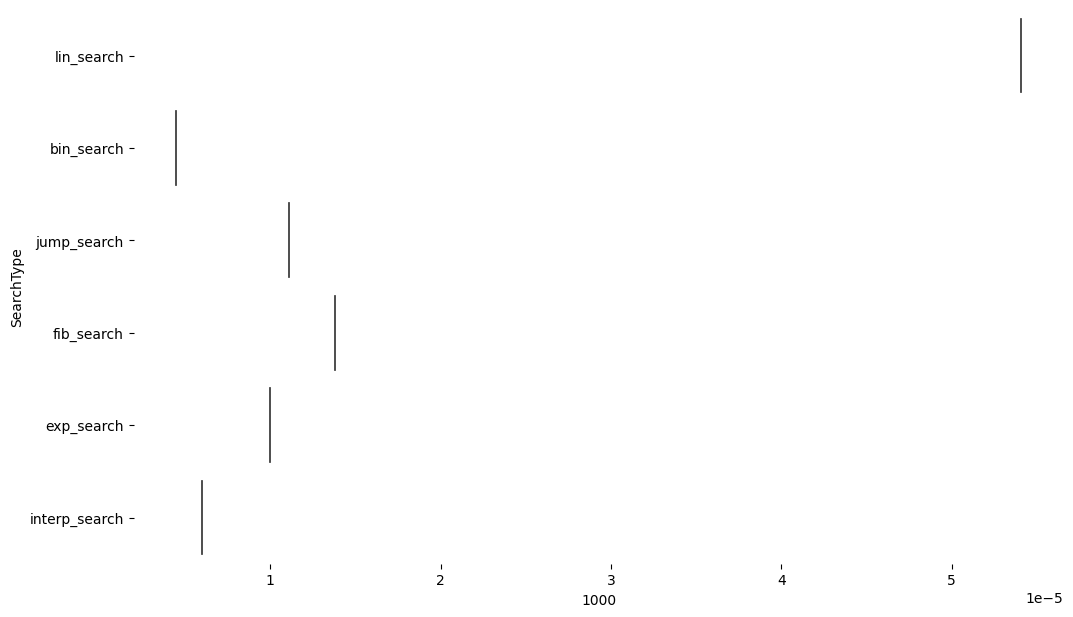

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['SearchType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='1000', y='SearchType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-81-9f09ddc7a435>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='100 000', y='SearchType', inner='stick', palette='Dark2')


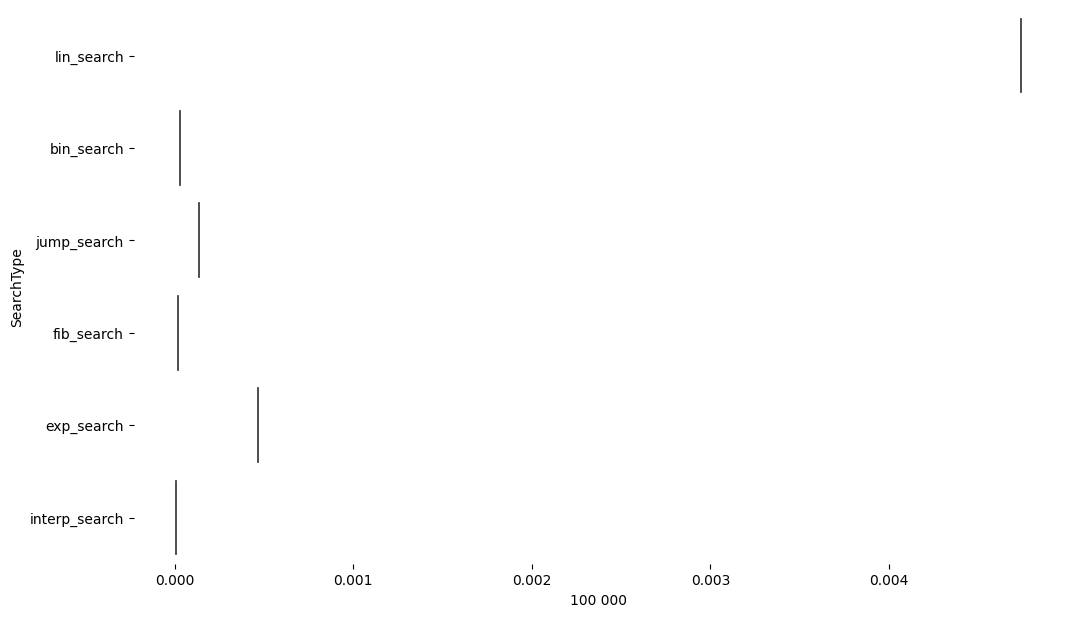

In [81]:
# @title SearchType vs 100 000

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['SearchType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='100 000', y='SearchType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-82-6ad2d84dda0b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='1 000 000', y='SearchType', inner='stick', palette='Dark2')


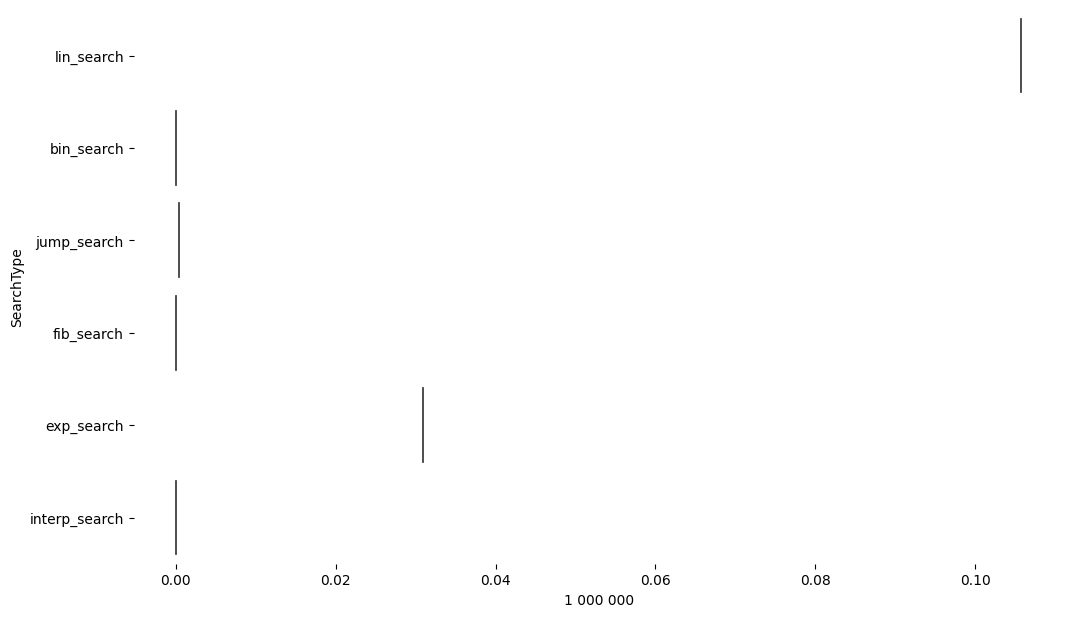

In [82]:
# @title SearchType vs 1 000 000

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['SearchType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='1 000 000', y='SearchType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Вывод

Из графиков видим, что во всех случаях себя хорошо показали бинарный и интерполяционный поиск. Так же на больших данных эффективны были поиск Фибоначчи и jump search. Экспонинциальный поиск на больших данных отработал дольше, чем на малых данных, но в целом уступает предыдущим способам. А линейный поиск оказался самым малоэффективных на любом количестве данных.

Можно сделать вывод, что лучше всего использовать бинарный или интерполяционный поиск. Если мы уверены, что данных будет немного, то можно использовать поиск Фибоначчи или jump search. Остальные варианты поиска не следует использовать в случаях, когда важна скорость выполнения.